<a href="https://colab.research.google.com/github/kingjiwoo/practice_unet_football_player/blob/main/Football_Player_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Common
import os 
import keras
import numpy as np
import pandas as pd
import tensorflow as tf

# Data 
from glob import glob
from tqdm import tqdm
import tensorflow.image as tfi
from tensorflow.keras.utils import load_img, img_to_array

# Data Visualization
import matplotlib.pyplot as plt

# Model
from tensorflow.keras.layers import add,Input,Layer,Conv2D,multiply,Dropout,MaxPool2D,Concatenate,Conv2DTranspose,Conv2DTranspose,BatchNormalization
from tensorflow.keras.callbacks import Callback, ModelCheckpoint
from tensorflow.keras.models import Model

# Model Visualization
from tensorflow.keras.utils import plot_model

In [2]:
# 경로로 가기
%cd /content/drive/MyDrive/football_images
# All Images and thier respective maps
all_images = glob("*.jpg")
all_paths = [path.replace(".jpg",".jpg___fuse.png") for path in all_images]

/content/drive/MyDrive/football_images


In [3]:
all_images[0]

'Frame 1  (18).jpg'

In [4]:
all_paths[0]

'Frame 1  (18).jpg___fuse.png'

In [32]:
#이미지와 레이블을 맞추기 
def load_image(path, SIZE=256):
    image = load_img(path)
    image = img_to_array(image)
    image = tf.cast(image, tf.float32)
    image = image/255.
    image = tf.image.resize(image, [SIZE, SIZE])
    return image

def load_data(image_paths, label_paths, SIZE=256):
    images, label_maps = np.zeros(shape=(len(image_paths), SIZE, SIZE, 3)), np.zeros(shape=(len(label_paths), SIZE, SIZE, 3))
    for i, (image_path, label_path) in tqdm(enumerate(zip(image_paths, label_paths)), desc="Loading"):
        image, label_map = load_image(image_path, SIZE=SIZE), load_image(label_path, SIZE=SIZE)
        images[i], label_maps[i] = image, label_map
    return images, label_maps

In [33]:
images, label_maps = load_data(all_images, all_paths)

Loading: 100it [00:22,  4.37it/s]


Data Visualization

In [37]:
# 원본이미지와 alpha값이 0.7인 레이블 이미지를 겹쳐 보게 해 시각화 확인
def show_map(image, label_map, alpha_1=1, alpha_2=0.7):
    plt.imshow(image, alpha=alpha_1)
    plt.imshow(label_map, alpha=alpha_2)
    plt.axis('off')




def show_maps(images, label_maps, GRID=[5,6], SIZE=(25,25)):
    #Plot Configuration
    n_rows, n_cols = GRID
    n_images = n_rows * n_cols
    plt.figure(figsize=SIZE)

    # Iterate through the Data 
    i = 1
    for image, label_map in zip(images, label_maps):

        #Plot Image
        plt.subplot(n_rows, n_cols, i)
        show_map(image, label_map)

        i +=1
        if i > n_images:
            break
    #Final Plot
    plt.show()

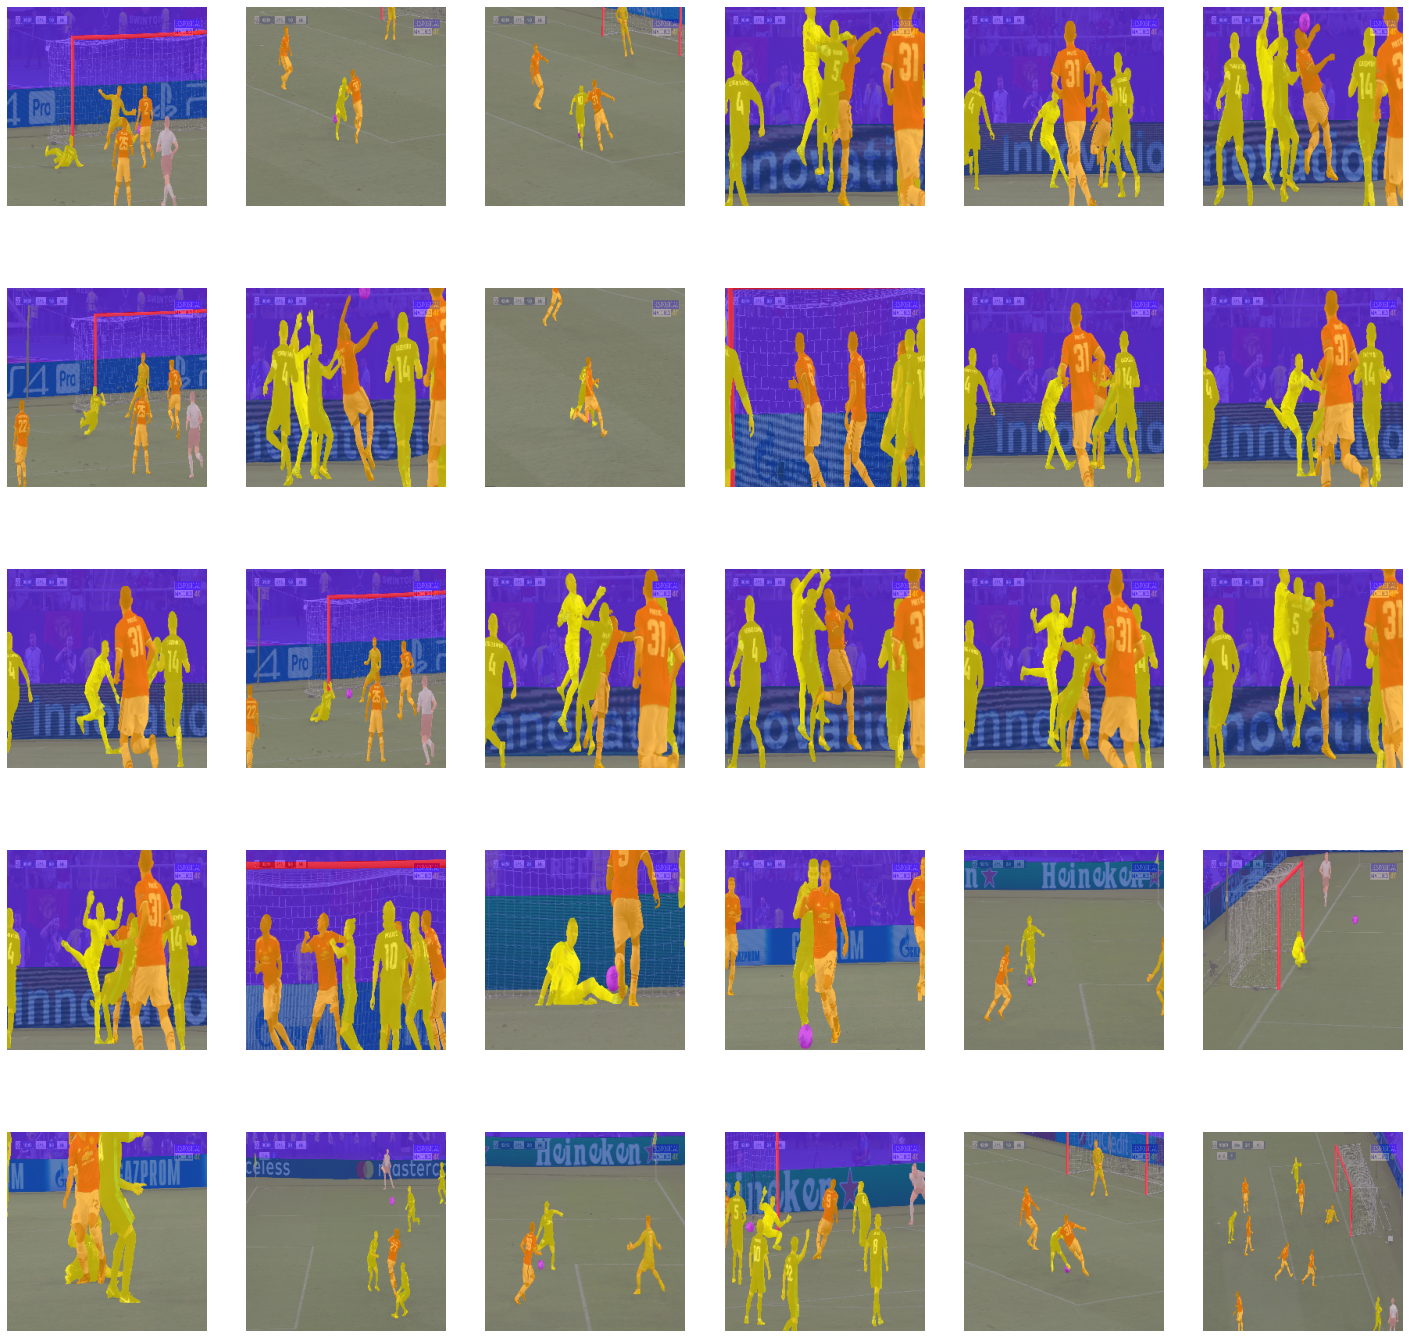

In [38]:
show_maps(images, label_maps)

UNet - EncoderBlock